In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys


In [2]:
sys.path.append("../..")
sys.path.append("..")

from analysis.multi_plot_utils import multi_disp_learn_hist, multi_compute_roc, multi_plot_roc
from analysis.comparison_utils import multi_get_masked_data, multi_collapse_test_output

from test_utils import load_test_output_pn


In [3]:
%load_ext autoreload
%matplotlib inline
%autoreload 2

In [4]:
############# define plotting params #############
c = plt.rcParams['axes.prop_cycle'].by_key()['color']
label_dict = {"$\gamma$":0, "$e$":1, "$\mu$":2}
inverse_label_dict = {0:"$\gamma$", 1:"$e$", 2:"$\mu$"}

In [5]:
############# define run locations #############
mp_locs = ['/home/jtindall/multiprocessing_framework_replication/multiprocessing_framework_seeding_fixed/mp_multi_gpu_seed_fix_1/outputs',
           '/home/jtindall/multiprocessing_framework_replication/multiprocessing_framework_seeding_fixed/mp_multi_gpu_seed_fix_2/outputs',
           '/home/jtindall/multiprocessing_framework_replication/multiprocessing_framework_seeding_fixed/mp_multi_gpu_seed_fix_3/outputs',
           '/home/jtindall/multiprocessing_framework_replication/multiprocessing_framework_seeding_fixed/mp_multi_gpu_seed_fix_4/outputs',
           '/home/jtindall/multiprocessing_framework_replication/multiprocessing_framework_seeding_fixed/mp_multi_gpu_seed_fix_5/outputs',
           '/home/jtindall/multiprocessing_framework_replication/multiprocessing_framework_seeding_fixed/mp_multi_gpu_seed_fix_6/outputs'
          ]

mp_titles = ['MP Framework Multi GPU Seed Fix Run 1',
             'MP Framework Multi GPU Seed Fix Run 2',
             'MP Framework Multi GPU Seed Fix Run 3',
             'MP Framework Multi GPU Seed Fix Run 4',
             'MP Framework Multi GPU Seed Fix Run 5',
             'MP Framework Multi GPU Seed Fix Run 6'
        ]

new_locs = ['/home/jtindall/new_framework_replication/new_frame_single_gpu_replication/1_gpu_run_1/outputs',
            '/home/jtindall/new_framework_replication/new_frame_single_gpu_replication/1_gpu_run_2/outputs',
            '/home/jtindall/new_framework_replication/new_frame_single_gpu_replication/1_gpu_run_3/outputs',
            '/home/jtindall/new_framework_replication/new_frame_single_gpu_replication/1_gpu_run_4/outputs',
            '/home/jtindall/new_framework_replication/new_frame_single_gpu_replication/1_gpu_run_5/outputs',
            '/home/jtindall/new_framework_replication/new_frame_single_gpu_replication/1_gpu_run_6/outputs',
            '/home/jtindall/new_framework_replication/new_frame_single_gpu_replication/1_gpu_run_7/outputs',
            '/home/jtindall/new_framework_replication/new_frame_single_gpu_replication/1_gpu_run_8/outputs',
            '/home/jtindall/new_framework_replication/new_frame_single_gpu_replication/1_gpu_run_9/outputs',
            '/home/jtindall/new_framework_replication/new_frame_single_gpu_replication/1_gpu_run_10/outputs'
           ]

new_titles = ['Pre-MP Framework Single GPU Run 1',
              'Pre-MP Framework Single GPU Run 2',
              'Pre-MP Framework Single GPU Run 3',
              'Pre-MP Framework Single GPU Run 4',
              'Pre-MP Framework Single GPU Run 5',
              'Pre-MP Framework Single GPU Run 6',
              'Pre-MP Framework Single GPU Run 7',
              'Pre-MP Framework Single GPU Run 8',
              'Pre-MP Framework Single GPU Run 9',
              'Pre-MP Framework Single GPU Run 10',
             ]

"""
new_linecolor = [c[0],c[1],c[2],c[3],c[4],c[5],c[6],c[7],c[8],c[9]]
new_linestyle = ['--','--','--','--','--','--','--','--','--','--']

old_linecolor = [c[0],c[1],c[2],c[3],c[4],c[5],c[6],c[7]]
old_linestyle = [':',':',':',':',':',':',':',':']
"""

mp_linecolor = [c[0] for _ in mp_locs]
mp_linestyle = ['--' for _ in mp_locs]

new_linecolor = [c[1] for _ in new_locs]
new_linestyle = [':' for _ in new_locs]

locs = mp_locs + new_locs
titles = mp_titles + new_titles
linecolor = mp_linecolor + new_linecolor
linestyle = mp_linestyle + new_linestyle


i:  0
Found training logs:  ['/home/jtindall/multiprocessing_framework_replication/multiprocessing_framework_seeding_fixed/mp_multi_gpu_seed_fix_1/outputs/log_train_0.csv', '/home/jtindall/multiprocessing_framework_replication/multiprocessing_framework_seeding_fixed/mp_multi_gpu_seed_fix_1/outputs/log_train_1.csv']
i:  1
Found training logs:  ['/home/jtindall/multiprocessing_framework_replication/multiprocessing_framework_seeding_fixed/mp_multi_gpu_seed_fix_2/outputs/log_train_0.csv', '/home/jtindall/multiprocessing_framework_replication/multiprocessing_framework_seeding_fixed/mp_multi_gpu_seed_fix_2/outputs/log_train_1.csv']
i:  2
Found training logs:  ['/home/jtindall/multiprocessing_framework_replication/multiprocessing_framework_seeding_fixed/mp_multi_gpu_seed_fix_3/outputs/log_train_0.csv', '/home/jtindall/multiprocessing_framework_replication/multiprocessing_framework_seeding_fixed/mp_multi_gpu_seed_fix_3/outputs/log_train_1.csv']
i:  3
Found training logs:  ['/home/jtindall/mult

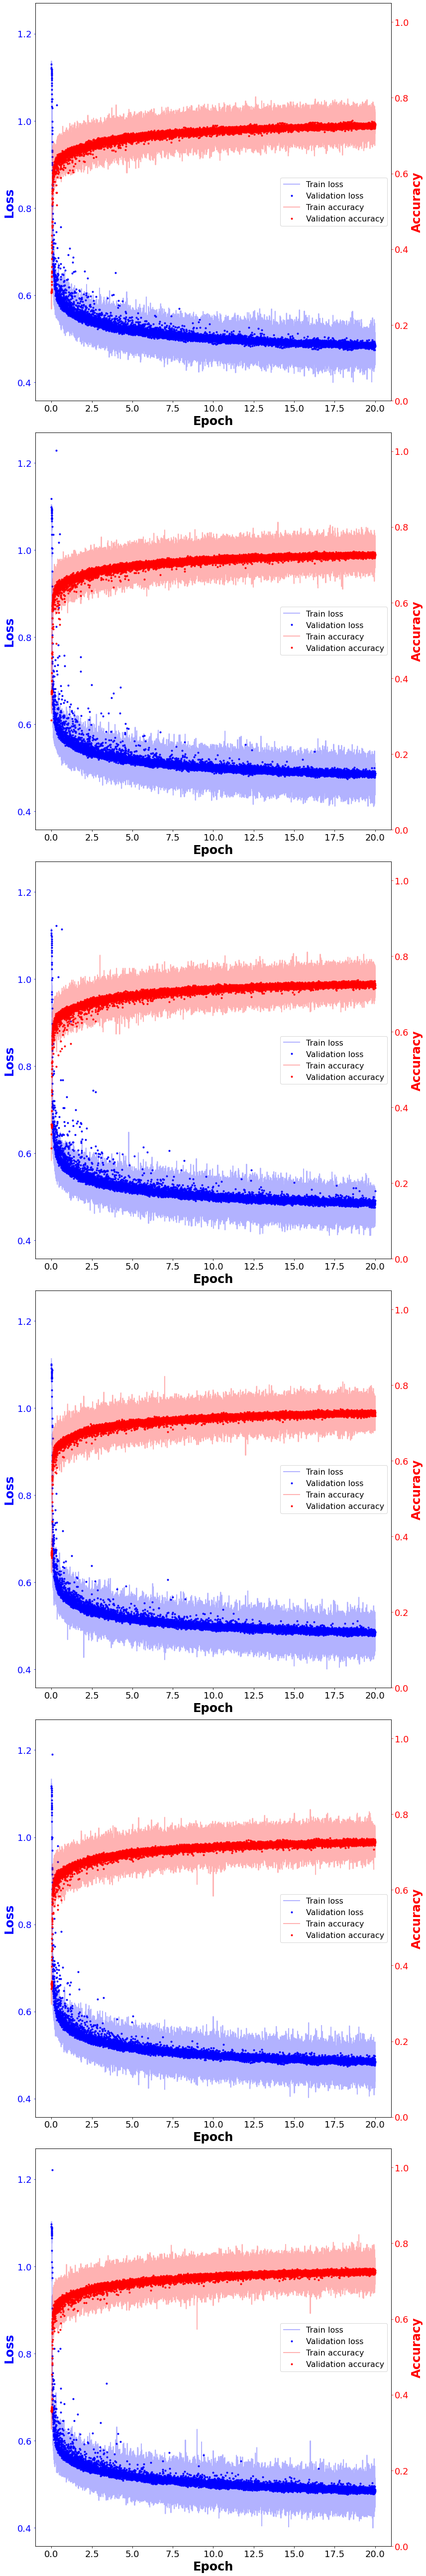

In [6]:
fig = multi_disp_learn_hist(mp_locs,losslim=2.5,titles=titles,leg_font=15, title_font=15,xmax=20)

In [7]:
############# load new run data #############
idx_file_path = '/fast_scratch/WatChMaL/data/IWCD_fulltank_300_post_veto_nomichel_pe_idxs.npz'
indices = np.load(idx_file_path)['test_idxs']

cut_path = '/home/jtindall/indices/pointnet_cut_indices.npz'

cuts_to_apply= ['fq_failed', 'fq_flag']

#mp_raw_predicted_labels = [np.load(loc + "/predictions.npy") for loc in mp_locs]
mp_raw_output_softmax   = [np.load(loc + "/softmax.npy") for loc in mp_locs]
mp_raw_actual_labels    = [np.load(loc + "/labels.npy") for loc in mp_locs]

In [8]:
############# load old run data #############

new_outputs = [load_test_output_pn(os.path.join(loc,'test_validation_iteration_dump.npz'),
                                   cut_path,
                                   np.load(idx_file_path)['test_idxs'], cut_list=[])
               for i, loc in enumerate(new_locs)]

new_raw_output_softmax   = [output["softmax"] for output in new_outputs]
new_raw_actual_labels    = [output["labels"] for output in new_outputs]
#new_raw_predicted_labels = [output["predictions"] for output in new_outputs]

data shape:  (2224824,)
test indices shape:  (2224824,)
data shape:  (2224824,)
test indices shape:  (2224824,)
data shape:  (2224824,)
test indices shape:  (2224824,)
data shape:  (2224824,)
test indices shape:  (2224824,)
data shape:  (2224824,)
test indices shape:  (2224824,)
data shape:  (2224824,)
test indices shape:  (2224824,)
data shape:  (2224824,)
test indices shape:  (2224824,)
data shape:  (2224824,)
test indices shape:  (2224824,)
data shape:  (2224824,)
test indices shape:  (2224824,)
data shape:  (2224824,)
test indices shape:  (2224824,)


In [9]:
############# combine run data #############
#raw_predicted_labels = mp_raw_predicted_labels + new_raw_predicted_labels
raw_output_softmax   = mp_raw_output_softmax + new_raw_output_softmax
raw_actual_labels    = mp_raw_actual_labels + new_raw_actual_labels

In [10]:
############# apply cuts to data #############
#predicted_labels = multi_get_masked_data(raw_predicted_labels, cut_path, indices, cuts_to_apply)
output_softmax   = multi_get_masked_data(raw_output_softmax, cut_path, indices, cuts_to_apply)
actual_labels    = multi_get_masked_data(raw_actual_labels, cut_path, indices, cuts_to_apply)

In [11]:
############# plot multi e/gamma ROC #############
fprs, tprs, thrs = multi_compute_roc(output_softmax, actual_labels, 
                                     true_label=label_dict["$e$"], 
                                     false_label=label_dict["$\gamma$"])

[<AxesSubplot:>]
[<AxesSubplot:title={'center':'$e$ vs $\\gamma$ Rejection'}, xlabel='$e$ Signal Efficiency', ylabel='$\\gamma$ Background Rejection'>]
[<AxesSubplot:title={'center':'$e$ vs $\\gamma$ Rejection'}, xlabel='$e$ Signal Efficiency', ylabel='$\\gamma$ Background Rejection'>]
[<AxesSubplot:title={'center':'$e$ vs $\\gamma$ Rejection'}, xlabel='$e$ Signal Efficiency', ylabel='$\\gamma$ Background Rejection'>]
[<AxesSubplot:title={'center':'$e$ vs $\\gamma$ Rejection'}, xlabel='$e$ Signal Efficiency', ylabel='$\\gamma$ Background Rejection'>]
[<AxesSubplot:title={'center':'$e$ vs $\\gamma$ Rejection'}, xlabel='$e$ Signal Efficiency', ylabel='$\\gamma$ Background Rejection'>]
[<AxesSubplot:title={'center':'$e$ vs $\\gamma$ Rejection'}, xlabel='$e$ Signal Efficiency', ylabel='$\\gamma$ Background Rejection'>]
[<AxesSubplot:title={'center':'$e$ vs $\\gamma$ Rejection'}, xlabel='$e$ Signal Efficiency', ylabel='$\\gamma$ Background Rejection'>]
[<AxesSubplot:title={'center':'$e$ vs 

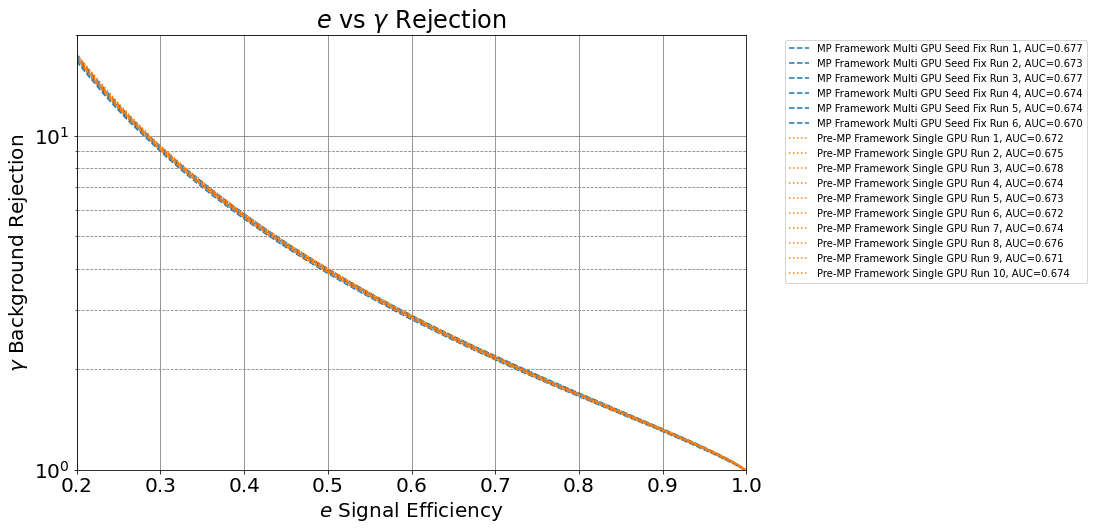

In [12]:
figs = multi_plot_roc(fprs, tprs, thrs, "$e$", "$\gamma$", 
                      fig_list=[1], xlims=[[0.2,1.0]],ylims=[[1e0,2e1]], 
                      linestyles=linestyle,linecolors=linecolor, 
                      plot_labels=titles, show=False)

In [13]:
############# plot multi e/mu ROC #############
fprs, tprs, thrs = multi_compute_roc(output_softmax, actual_labels, 
                                     true_label=label_dict["$e$"], 
                                     false_label=label_dict["$\mu$"])

[<AxesSubplot:>]
[<AxesSubplot:title={'center':'$e$ vs $\\mu$ Rejection'}, xlabel='$e$ Signal Efficiency', ylabel='$\\mu$ Background Rejection'>]
[<AxesSubplot:title={'center':'$e$ vs $\\mu$ Rejection'}, xlabel='$e$ Signal Efficiency', ylabel='$\\mu$ Background Rejection'>]
[<AxesSubplot:title={'center':'$e$ vs $\\mu$ Rejection'}, xlabel='$e$ Signal Efficiency', ylabel='$\\mu$ Background Rejection'>]
[<AxesSubplot:title={'center':'$e$ vs $\\mu$ Rejection'}, xlabel='$e$ Signal Efficiency', ylabel='$\\mu$ Background Rejection'>]
[<AxesSubplot:title={'center':'$e$ vs $\\mu$ Rejection'}, xlabel='$e$ Signal Efficiency', ylabel='$\\mu$ Background Rejection'>]
[<AxesSubplot:title={'center':'$e$ vs $\\mu$ Rejection'}, xlabel='$e$ Signal Efficiency', ylabel='$\\mu$ Background Rejection'>]
[<AxesSubplot:title={'center':'$e$ vs $\\mu$ Rejection'}, xlabel='$e$ Signal Efficiency', ylabel='$\\mu$ Background Rejection'>]
[<AxesSubplot:title={'center':'$e$ vs $\\mu$ Rejection'}, xlabel='$e$ Signal Eff

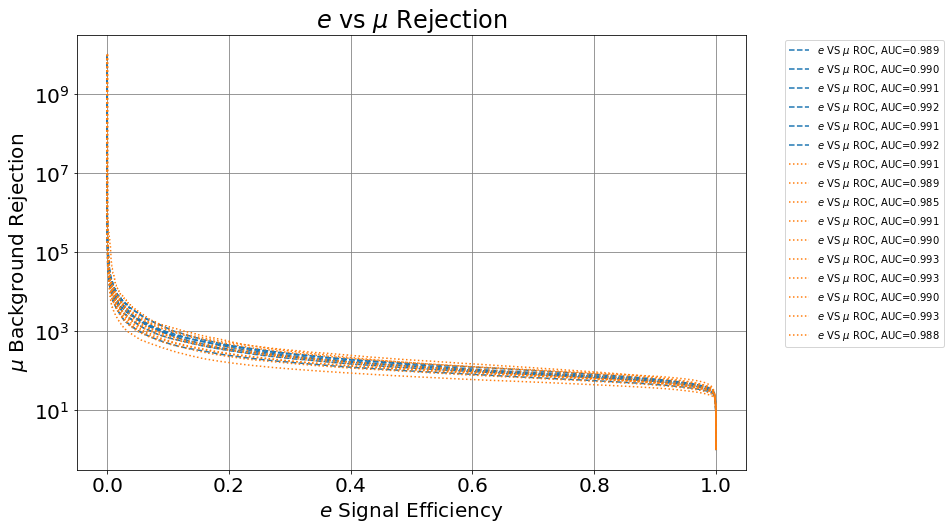

In [14]:
figs = multi_plot_roc(fprs, tprs, thrs, "$e$", "$\mu$", fig_list=[1], 
                      linestyles=linestyle,linecolors=linecolor, show=False)

In [15]:
############# plot collapsed ROC #############
"""
plot_list=["$e$", "$\gamma$"]
vs_list=["$\mu$"]
"""
collapsed_class_scores_list, collapsed_class_labels_list = multi_collapse_test_output(output_softmax, actual_labels, label_dict, ignore_type='$\gamma$')

collapsed_class_labels_list = [collapsed_class_labels - 1 for collapsed_class_labels in collapsed_class_labels_list]
collapsed_class_scores_list = [collapsed_class_scores[:,1:] for collapsed_class_scores in collapsed_class_scores_list]

[<AxesSubplot:>]
[<AxesSubplot:title={'center':'e/gamma vs mu Rejection'}, xlabel='e/gamma Signal Efficiency', ylabel='mu Background Rejection'>]
[<AxesSubplot:title={'center':'e/gamma vs mu Rejection'}, xlabel='e/gamma Signal Efficiency', ylabel='mu Background Rejection'>]
[<AxesSubplot:title={'center':'e/gamma vs mu Rejection'}, xlabel='e/gamma Signal Efficiency', ylabel='mu Background Rejection'>]
[<AxesSubplot:title={'center':'e/gamma vs mu Rejection'}, xlabel='e/gamma Signal Efficiency', ylabel='mu Background Rejection'>]
[<AxesSubplot:title={'center':'e/gamma vs mu Rejection'}, xlabel='e/gamma Signal Efficiency', ylabel='mu Background Rejection'>]
[<AxesSubplot:title={'center':'e/gamma vs mu Rejection'}, xlabel='e/gamma Signal Efficiency', ylabel='mu Background Rejection'>]
[<AxesSubplot:title={'center':'e/gamma vs mu Rejection'}, xlabel='e/gamma Signal Efficiency', ylabel='mu Background Rejection'>]
[<AxesSubplot:title={'center':'e/gamma vs mu Rejection'}, xlabel='e/gamma Signal

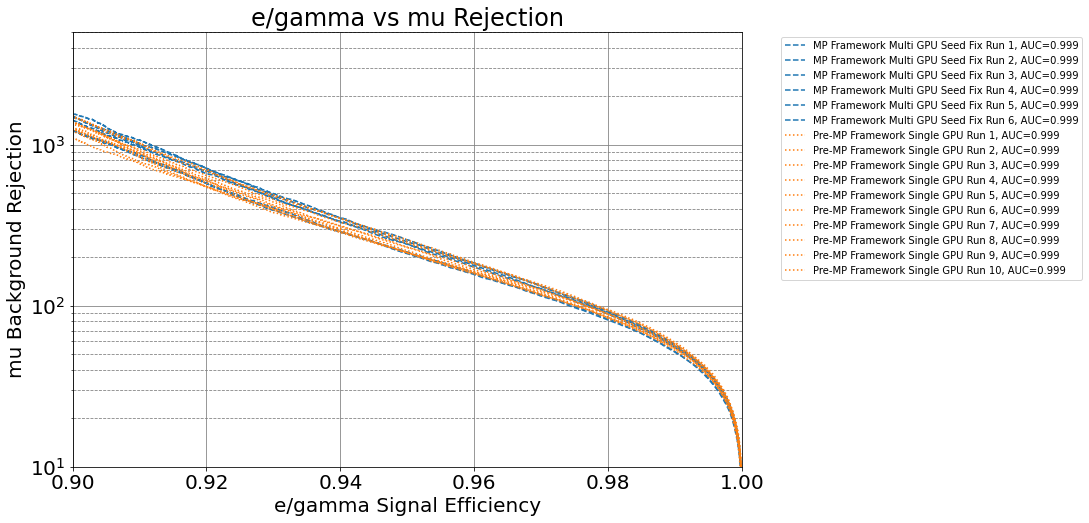

In [16]:
muon_softmax_index_dict = {"e/gamma":0, "mu":1}

fpr_list, tpr_list, thr_list = multi_compute_roc(collapsed_class_scores_list, collapsed_class_labels_list, 
                            true_label=muon_softmax_index_dict["e/gamma"], 
                            false_label=muon_softmax_index_dict["mu"])

figs = multi_plot_roc(fpr_list, tpr_list, thr_list,"e/gamma", "mu", 
                      fig_list=[1], xlims=[[0.9,1.0]],ylims=[[1e1,5e3]], 
                      linestyles=linestyle,linecolors=linecolor, plot_labels=titles, show=False)

In [17]:
# Compute stddev
from statistics import stdev

sample_efficiencies = [0.90, 0.94, 0.98]
def compute_stdevs(test_tpr_list, test_fpr_list, N, symbol):
    rejections_list = [1.0/(fpr+1e-10) for fpr in test_fpr_list]

    compute_indices_list = np.array([[np.argmin(abs(tpr - value)) for value in sample_efficiencies] for tpr in test_tpr_list])
    #print(compute_indices_list)

    test_sample_efficiencies = np.array([tpr[compute_indices] for tpr, compute_indices in zip(test_tpr_list, compute_indices_list)])
    #print(test_sample_efficiencies)

    rejections = np.array([rejections[compute_indices] for rejections, compute_indices in zip(rejections_list, compute_indices_list)])
    #print(rejections)

    stdevs  = [stdev(rejections[:, i]) for i in range(rejections.shape[1])]
    d_stdevs = [std / np.sqrt(2*N) for std in stdevs]
    #print(stdevs)

    for std, sample_efficiency, d_stdev in zip(stdevs, sample_efficiencies, d_stdevs):
        print("sample efficiency: ", sample_efficiency , " σ: ", std, " σ/sqrt(2{}): ".format(symbol), d_stdev)
    
    return stdevs, d_stdevs


In [18]:
#compute_stdevs(tpr_list, fpr_list, N = len(locs))

In [19]:
cap = len(mp_locs)
print("There are ", cap, "MP runs")
print("\n MP runs:")
sigma_mp, d_sigma_mp = compute_stdevs(tpr_list[:cap], fpr_list[:cap], N = len(mp_locs), symbol="N")

print("\npre-MP runs:")
sigma, d_sigma = compute_stdevs(tpr_list[cap:], fpr_list[cap:], N = len(new_locs), symbol="N")

There are  6 MP runs

 MP runs:
sample efficiency:  0.9  σ:  144.1140456169922  σ/sqrt(2N):  41.60214151548823
sample efficiency:  0.94  σ:  29.018122835225682  σ/sqrt(2N):  8.376810515147588
sample efficiency:  0.98  σ:  4.694435906822743  σ/sqrt(2N):  1.3551669172487777

pre-MP runs:
sample efficiency:  0.9  σ:  128.4709105700625  σ/sqrt(2N):  28.7269689165956
sample efficiency:  0.94  σ:  23.856190734371527  σ/sqrt(2N):  5.334406416625536
sample efficiency:  0.98  σ:  4.133906293331637  σ/sqrt(2N):  0.9243695484503726


In [20]:
for sample_efficiency, std_1, d_stdev_1, std_2, d_stdev_2, in zip(sample_efficiencies, sigma_mp, d_sigma_mp, sigma, d_sigma):
        diff = std_2 - std_1
        sigma_diff = np.sqrt(d_stdev_1**2 + d_stdev_2**2)
        print("sample efficiency: ", sample_efficiency , " (σ - σ_MP): ", diff, " σ_(σ - σ_MP): ", sigma_diff)

sample efficiency:  0.9  (σ - σ_MP):  -15.6431350469297  σ_(σ - σ_MP):  50.55667039876894
sample efficiency:  0.94  (σ - σ_MP):  -5.161932100854155  σ_(σ - σ_MP):  9.931104985067012
sample efficiency:  0.98  (σ - σ_MP):  -0.5605296134911057  σ_(σ - σ_MP):  1.6404073993090562


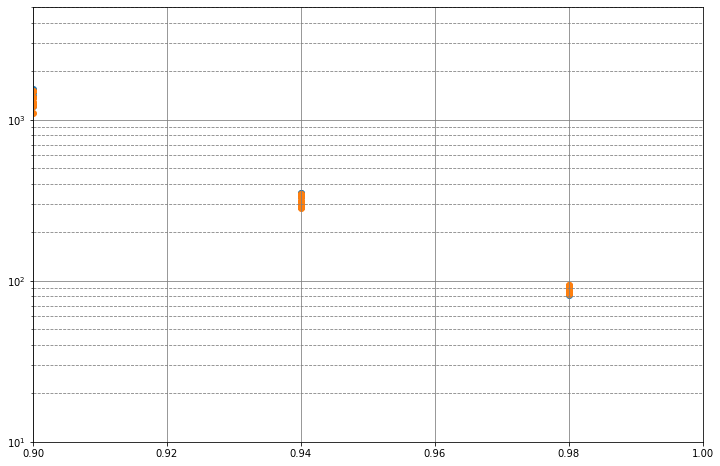

In [21]:
fig, ax = plt.subplots(figsize=(12,8),facecolor="w")

sample_efficiencies = [0.90, 0.94, 0.98]
rejections_list = [1.0/(fpr+1e-10) for fpr in fpr_list]

compute_indices_list = np.array([[np.argmin(abs(tpr - value)) for value in sample_efficiencies] for tpr in tpr_list])
#print(compute_indices_list)

test_sample_efficiencies = np.array([tpr[compute_indices] for tpr, compute_indices in zip(tpr_list, compute_indices_list)])
#print(test_sample_efficiencies)

rejections = np.array([rejections[compute_indices] for rejections, compute_indices in zip(rejections_list, compute_indices_list)])
#print(rejections)

for i in range(len(rejections)):
    ax.scatter(np.array(sample_efficiencies), rejections[i], color=linecolor[i])
ax.set_yscale('log')
ax.grid(b=True, which='major', color='gray', linestyle='-')
ax.grid(b=True, which='minor', color='gray', linestyle='--')
ax.set_xlim(0.9,1.0)
ax.set_ylim(1e1,5e3)

plt.show()